In [1]:
# 물류의 최적 경로를 예측해보자!

In [2]:
import pandas as pd

factories = pd.read_csv('tbl_factory.csv', index_col = 0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


In [3]:
warehouses = pd.read_csv('tbl_warehouse.csv', index_col = 0) # FCID에서 WHID로 운송할 때 드는 비용에 관한 데이터셋
cost = pd.read_csv('rel_cost.csv', index_col = 0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [4]:
trans = pd.read_csv('tbl_transaction.csv', index_col = 0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [5]:
join_data = pd.merge(trans, cost, left_on = ['ToFC', 'FromWH'], right_on = ['FCID', 'WHID'], how = 'left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [6]:
join_data = pd.merge(join_data, factories, left_on = 'ToFC', right_on = 'FCID', how = 'left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부


In [7]:
join_data = pd.merge(join_data, warehouses, left_on = 'FromWH', right_on = 'WHID', how = 'left')
join_data = join_data[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName', 'FCDemand', 'FromWH', 'WHName', 'WHSupply', 'WHRegion']]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부


In [8]:
north = join_data.loc[join_data['WHRegion'] == '북부']
north.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
7,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
8,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부


In [9]:
south = join_data.loc[join_data['WHRegion'] == '남부']
south.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
5,2019-01-01 08:56:09,31,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부
6,2019-01-01 09:00:15,33,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
9,2019-01-01 14:12:51,21,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부


In [10]:
print("북부지사 총 비용: " + str(north['Cost'].sum()) + "만원")
print("남부지사 총 비용: " + str(south['Cost'].sum()) + "만원")

북부지사 총 비용: 2189.3만원
남부지사 총 비용: 2062.0만원


In [11]:
print("북부지사 총부품 운송개수: " + str(north['Quantity'].sum()) + "개")
print("남부지사 총부품 운송개수: " + str(south['Quantity'].sum()) + "개")

북부지사 총부품 운송개수: 49146개
남부지사 총부품 운송개수: 50214개


In [12]:
tmp = (north['Cost'].sum() / north['Quantity'].sum()) * 10000
print('북부지사의 부품 1개당 운송 비용: ' + str(int(tmp)) + "원")
tmp = (south['Cost'].sum() / south['Quantity'].sum()) * 10000
print('남부지사의 부품 1개당 운송 비용: ' + str(int(tmp)) + "원")

북부지사의 부품 1개당 운송 비용: 445원
남부지사의 부품 1개당 운송 비용: 410원


In [13]:
cost_chk = pd.merge(cost, factories, on = 'FCID', how = 'left')
cost_chk.head()

,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,FC00001,WH00001,0.4,서울공장,28,북부
1,FC00001,WH00002,0.8,서울공장,28,북부
2,FC00001,WH00003,1.5,서울공장,28,북부
3,FC00002,WH00001,0.9,수원공장,29,북부
4,FC00002,WH00002,0.8,수원공장,29,북부


In [14]:
print('북부지사의 평균 비용: ' + str(cost_chk['Cost'].loc[cost_chk['FCRegion'] == '북부'].mean()) + '원')
print('남부지사의 평균 비용: ' + str(cost_chk['Cost'].loc[cost_chk['FCRegion'] == '남부'].mean()) + '원')

북부지사의 평균 비용: 1.075원
남부지사의 평균 비용: 1.05원


In [15]:
# NetworkX를 활용하여 네트워크를 가시화해보자.

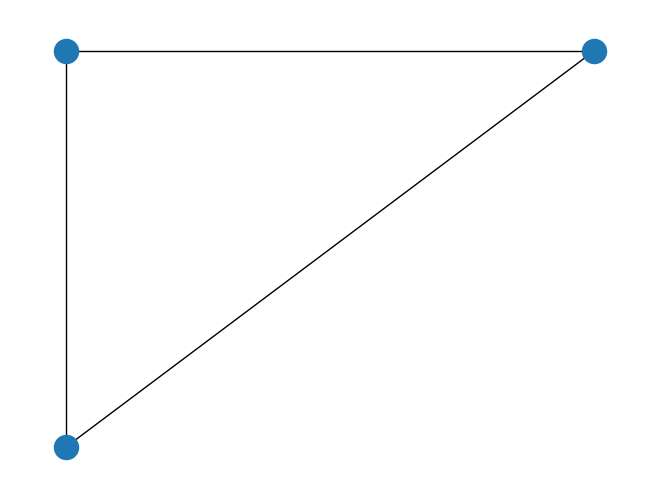

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

pos = {}
pos["nodeA"] = (0,0)
pos['nodeB'] = (1,1)
pos['nodeC'] = (0,1)

nx.draw(G, pos)

plt.show()

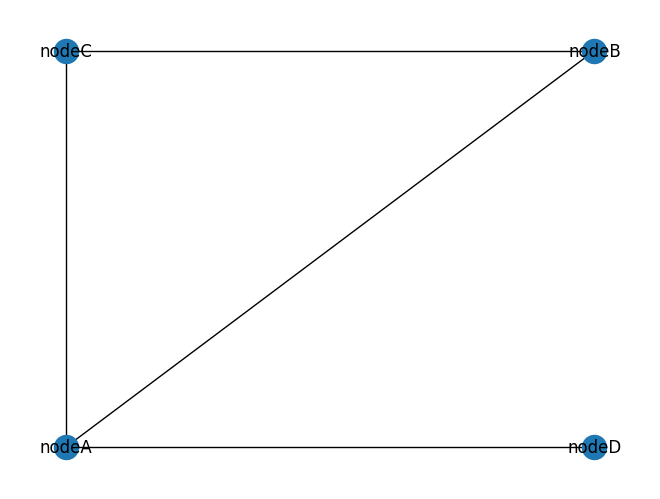

In [17]:
# 새로운 노드를 추가해보자

G.add_node('nodeD')

G.add_edge('nodeA', 'nodeD')

pos['nodeD'] = (1,0)

nx.draw(G, pos, with_labels = True)

In [18]:
# 경로에 가중치를 부여해보자!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')
df_w

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [19]:
df_p

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [20]:
# 엣지 가중치 리스트화
size = 10
edge_weights = []
for i in range(len(df_w)):
  for j in range(len(df_w.columns)):
    edge_weights.append(df_w.iloc[i][j] * size)
edge_weights

[6.39921,
 1.4335300000000002,
 9.44669,
 5.21848,
 0.0,
 2.64556,
 0.0,
 4.5615,
 5.68434,
 0.0,
 6.17635,
 6.12096,
 6.16934,
 9.43748,
 0.0,
 0.0,
 0.0,
 6.97631,
 0.60225,
 6.66767,
 6.706379999999999,
 2.10383,
 0.0,
 3.15428,
 0.0]

In [21]:
# 그래프 객체 설정
G = nx.Graph()

# 노드 설정
for i in range(len(df_w.columns)):
  G.add_node(df_w.columns[i])

In [22]:
# 엣지 설정
for i in range(len(df_w.columns)):
  for j in range(len(df_w.columns)):
    G.add_edge(df_w.columns[i], df_w.columns[j])

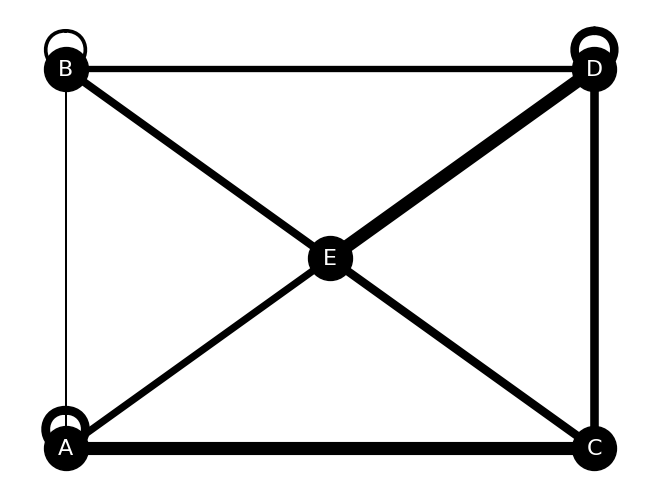

In [23]:
# 좌표 설정
pos = {}
for i in range(len(df_w.columns)):
  node = df_w.columns[i]
  pos[node] = (df_p[node][0], df_p[node][1])

# 그리기
nx.draw(G, pos, with_labels = True, font_size = 16, node_size = 1000, node_color = 'k', font_color = 'w',
        width = edge_weights)

plt.show()

In [24]:
df_tr = pd.read_csv('trans_route.csv', index_col = '공장')
df_tr.head()

# 어느 창고에서 어느 공장으로 얼마나 운송을 했는지에 대한 정보를 파악할 수 있다.

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [25]:
# 네트워크 가시화를 통해 한 눈에 쉽게 알아보자

df_pos = pd.read_csv('trans_route_pos.csv')
df_pos.head()

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


In [26]:
# 객체 생성
G = nx.Graph()

# 노드를 설정
for i in range(len(df_pos.columns)):
  G.add_node(df_pos.columns[i])

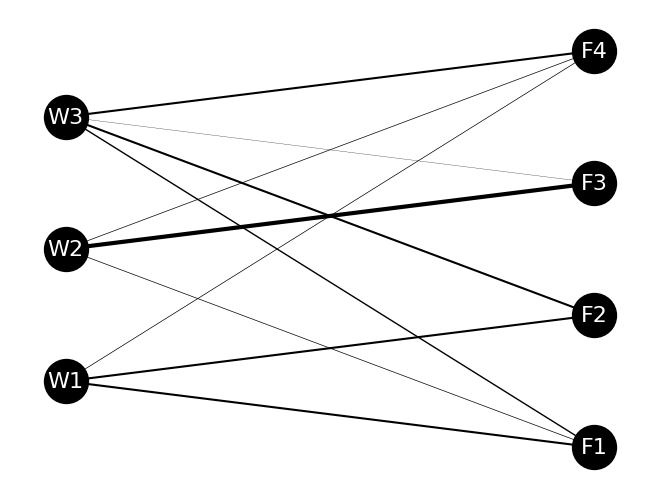

In [27]:
# 엣지 설정 및 가중치 리스트화
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
  for j in range(len(df_pos.columns)):
    if not(i==j):
      G.add_edge(df_pos.columns[i],df_pos.columns[j])
      if num_pre < len(G.edges):
        num_pre = len(G.edges)
        weight = 0
        if(df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
          if df_tr[df_pos.columns[i]][df_pos.columns[j]] * size:
            weight = df_tr[df_pos.columns[i]][df_pos.columns[j]] * size
        elif(df_pos.columns[j] in df_tr.columns) and(df_pos.columns[i] in df_tr.index):
          if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
            weight = df_tr[df_pos.columns[j]][df_pos.columns[i]] * size
        edge_weights.append(weight)

pos = {}
for i in range(len(df_pos.columns)):
  node = df_pos.columns[i]
  pos[node] = (df_pos[node][0], df_pos[node][1])

nx.draw(G, pos, with_labels = True, font_size = 16, node_size = 1000, node_color = 'k', font_color = 'w', width = edge_weights)

plt.show()

# 네트워크를 통해 어느 창고에서 어는 공장이든 골고루 엣지가 보인다는 점이다. 운송 비용을 고려하여 운송 경로는 어느 정도 집중되는 편이 효율적이라고 생각된다.

In [28]:
# 운송 최적화 문제를 풀어보자. -> 최소화 또는 최대화 하고 싶은 것을 함수로 정의한다. -> 목적 함수
# 목적 함수를 해결하기 위해서는 다양한 조건들을 지켜야하는데 이것들을 제약 조건이라고 한다.
# 제약 조건을 만족하며 목적 함수를 해결해보자

In [33]:
df_tr = pd.read_csv('trans_route.csv', index_col = '공장')
df_tc = pd.read_csv('trans_cost.csv', index_col = '공장')

def trans_cost(df_tr, df_tc):
  cost = 0
  for i in range(len(df_tr.index)):
    for j in range(len(df_tr.columns)):
      cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
  return cost

print("총 운송 비용: " + str(trans_cost(df_tr, df_tc)))

총 운송 비용: 1493


In [34]:
df_tc

,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [28]:
# 제약 조건을 만들어보자

In [35]:
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

# 수요측 제약조건
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i])+"으로 운송량:"+str(temp_sum)+" (수요량:"+str(df_demand.iloc[0][i])+")")
    if temp_sum>=df_demand.iloc[0][i]:
        print("수요량을 만족시키고있음")
    else:
        print("수요량을 만족시키지 못하고 있음. 운송경로 재계산 필요")

# 공급측 제약조건
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i])+"부터의 운송량:"+str(temp_sum)+" (공급한계:"+str(df_supply.iloc[0][i])+")")
    if temp_sum<=df_supply.iloc[0][i]:
        print("공급한계 범위내")
    else:
        print("공급한계 초과. 운송경로 재계산 필요")

F1으로 운송량:30 (수요량:28)
수요량을 만족시키고있음
F2으로 운송량:30 (수요량:29)
수요량을 만족시키고있음
F3으로 운송량:32 (수요량:31)
수요량을 만족시키고있음
F4으로 운송량:25 (수요량:25)
수요량을 만족시키고있음
W1부터의 운송량:35 (공급한계:35)
공급한계 범위내
W2부터의 운송량:40 (공급한계:41)
공급한계 범위내
W3부터의 운송량:42 (공급한계:42)
공급한계 범위내


In [28]:
# 테스트를 하기 위해 W1에서 F4로의 운송을 줄이고, 그만큼을 W2에서 F4로의 운송으로 변경하여 목적함수의 변화를 확인해보자.

In [37]:
df_tr_new = pd.read_csv('trans_route_new.csv', index_col="공장")
print(df_tr_new)

# 총 운송비용 재계산
print("총 운송 비용(변경 후):"+str(trans_cost(df_tr_new,df_tc)))

# 제약조건 계산함수
# 수요측
def condition_demand(df_tr,df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum>=df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

# 공급측
def condition_supply(df_tr,df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum<=df_supply.iloc[0][i]:
            flag[i] = 1
    return flag

print("수요조건 계산결과:"+str(condition_demand(df_tr_new,df_demand)))
print("공급조건 계산결과:"+str(condition_supply(df_tr_new,df_supply)))

# 비용이 약간은 절감이 되었지만 제약조건인 두번째 공급조건을 만족하지 못한 것을 확인할 수 있었다.
# 이를 통해 목적함수를 최적화하는 것은 쉽지않았음을 알게되었다.
# 다음에는 이 목적함수를 최적화하는 방법에 대해 알아보자.

    F1  F2  F3  F4
공장                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15
총 운송 비용(변경 후):1428
수요조건 계산결과:[1. 1. 1. 1.]
공급조건 계산결과:[1. 0. 1.]
